In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/content/yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.drop(['business_id', 'review_id', 'user_id'], axis = 1, inplace = True)

In [5]:
df.head()

,date,stars,text,type,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0


In [6]:
df['type'].value_counts()

review    10000
Name: type, dtype: int64

In [7]:
df = df.drop('type', axis = 1)

In [8]:
df.head()

,date,stars,text,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [9]:
df = df[['stars', 'text']]

In [10]:
df

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
...,...,...
9995,3,First visit...Had lunch here today - used my G...
9996,4,Should be called house of deliciousness!\n\nI ...
9997,4,I recently visited Olive and Ivy for business ...
9998,2,My nephew just moved to Scottsdale recently so...


In [11]:
df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [12]:
df_1 = df[df['stars'] == 1]
df_5 = df[df['stars'] == 5]

In [13]:
df = pd.concat([df_1.sample(749), df_5.sample(749)])

In [14]:
df

,stars,text
6868,1,Let me preface this review ..I have lived in t...
2490,1,Lazy Q CLOSED in 2010. New Owners cleaned up ...
165,1,This place is not there anymore.
5714,1,WOW! I have never been to a place with servic...
9730,1,My g/f love sushi! She made me a connosiuer of...
...,...,...
5085,5,Super friendly. Joe was there greeting everyon...
1800,5,This review can be applied to any and all Quic...
2998,5,"It is a 110 mile round trip for me, passing wh..."
4701,5,Pauli from ATL checking in here.... just for a...


In [15]:
df['lenght'] = df['text'].apply(len)

In [16]:
df

,stars,text,lenght
6868,1,Let me preface this review ..I have lived in t...,1478
2490,1,Lazy Q CLOSED in 2010. New Owners cleaned up ...,189
165,1,This place is not there anymore.,32
5714,1,WOW! I have never been to a place with servic...,1408
9730,1,My g/f love sushi! She made me a connosiuer of...,1063
...,...,...,...
5085,5,Super friendly. Joe was there greeting everyon...,207
1800,5,This review can be applied to any and all Quic...,700
2998,5,"It is a 110 mile round trip for me, passing wh...",235
4701,5,Pauli from ATL checking in here.... just for a...,2080


<ipython-input-17-ef04c0ff7c53>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lenght'])


<Axes: xlabel='lenght', ylabel='Density'>

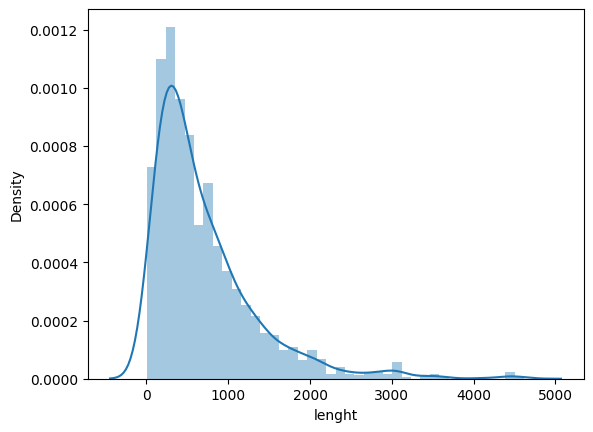

In [17]:
sns.distplot(df['lenght'])

In [18]:
str1 = df['text'][4333]

In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
list1 = [char for char in str1 if char not in string.punctuation]
list1 = ''.join(list1)



In [22]:
import nltk

In [23]:
#nltk.download()

In [24]:
from nltk.corpus import stopwords

In [25]:
str1 = [word for word in list1.split() if word.lower() not in stopwords.words('english')]

In [ ]:
str1

In [37]:
def clean_text(text):
  list1 = [char for char in text if char not in string.punctuation]
  list1 = ''.join(list1)
  return [word for word in list1.split() if word.lower() not in stopwords.words('english')]

In [30]:
clean_text(df['text'][6868])

['Let',
 'preface',
 'review',
 'lived',
 'area',
 '15',
 'years',
 'Chompies',
 'option',
 'good',
 'Jewish',
 'deli',
 '51',
 'years',
 'never',
 'received',
 'worse',
 'service',
 'Chompies',
 'ALWAYS',
 'get',
 'order',
 'wrong',
 'Tonight',
 'much',
 'debate',
 'caved',
 'daughter',
 'strep',
 'throat',
 'wanted',
 'nothing',
 'else',
 'matzah',
 'ball',
 'soup',
 'make',
 'feel',
 'better',
 'reluctantly',
 'called',
 'take',
 'Chompies',
 'assumed',
 'one',
 'thing',
 'menu',
 'might',
 'safe',
 'bet',
 'hard',
 'screw',
 'would',
 'soup',
 'returned',
 'home',
 'called',
 'daughter',
 'tell',
 'got',
 'doctor',
 'ordered',
 'watched',
 'pour',
 'bowl',
 'noticed',
 'missing',
 'one',
 'key',
 'ingredient',
 'SOUP',
 'decided',
 'call',
 'tell',
 'Chompies',
 '10th',
 '12',
 'time',
 'row',
 'screwed',
 'order',
 'screwing',
 'order',
 'forgetting',
 'soup',
 'SOUP',
 'told',
 'wanted',
 'broth',
 'asked',
 'separate',
 'container',
 'responded',
 'didnt',
 'think',
 'ask',
 'br

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
text_bow = CountVectorizer(analyzer=clean_text).fit_transform(df['text'])

In [38]:
text_bow.shape

(1498, 15358)

In [40]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
Xt, Xs, yt, ys = train_test_split(text_bow, df['stars'], test_size = 0.2, random_state = 0)

In [46]:
model = MultinomialNB().fit(Xt, yt)

In [47]:
pred = model.predict(Xs)

In [52]:
print(confusion_matrix(ys,pred))
print('\n')
print(classification_report(ys,pred))

[[141  19]
 [ 13 127]]


              precision    recall  f1-score   support

           1       0.92      0.88      0.90       160
           5       0.87      0.91      0.89       140

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [54]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_idf = TfidfTransformer().fit_transform(text_bow)

In [55]:
Xt, Xs, yt, ys = train_test_split(tf_idf, df['stars'], test_size = 0.2, random_state = 0)

In [56]:
model = MultinomialNB().fit(Xt, yt)

In [57]:
pred = model.predict(Xs)

In [58]:
print(confusion_matrix(ys,pred))
print('\n')
print(classification_report(ys,pred))

[[146  14]
 [ 15 125]]


              precision    recall  f1-score   support

           1       0.91      0.91      0.91       160
           5       0.90      0.89      0.90       140

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

